In [1]:
!pip install -q transformers datasets controlnet_aux

In [2]:
from controlnet_aux import LineartDetector
processor = LineartDetector.from_pretrained("lllyasviel/Annotators")

/opt/conda/lib/python3.10/site-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(


sk_model.pth:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

sk_model2.pth:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/controlnet_aux/lineart/__init__.py:112: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, ma

In [3]:
from datasets import load_dataset
ds=load_dataset("Subh775/Filtered_Movies_Caption_Dataset",split="train")

README.md:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/439M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/432M [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/432M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/425M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5384 [00:00<?, ? examples/s]

In [4]:
ds

Dataset({
    features: ['image', 'caption'],
    num_rows: 5384
})

In [5]:
ds[4563]["caption"]
#ds2[2796]["caption"]

'"The image is a movie poster for the film ""Son of a Rich"". The main design elements include a young man holding a wooden sign with the text ""From hero to zero"" and a group of people in the background. The layout of the poster features the title text at the bottom and the main character\'s face in the center. There is no visible promotional text or filler text in the image."'

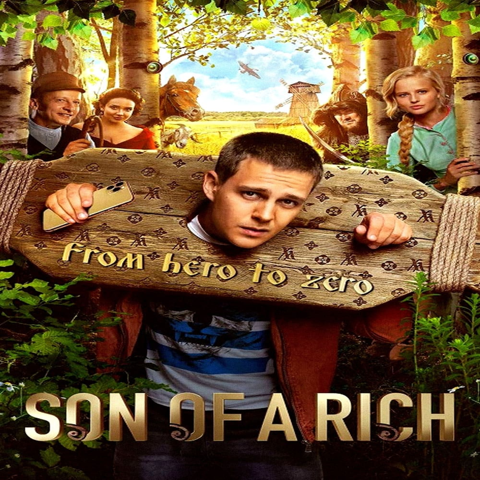

In [6]:
#RGB image
ds[4563]['image']

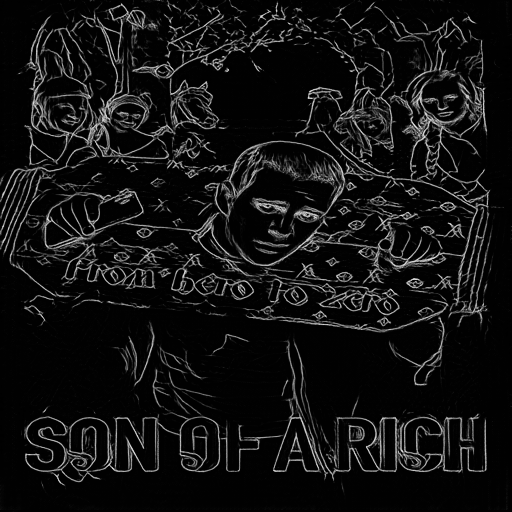

In [7]:
#Conditional image 
processor(ds[4563]['image'])

In [ ]:
from tqdm import tqdm

captions = []
images = []
conditional_images = []

for example in tqdm(ds, desc="Processing images"):
    caption = example['caption']
    image = example['image']
    
    # Assuming you have a `processor` function that processes the image
    conditional_image = processor(image)

    # Append the processed data to the lists
    captions.append(caption)
    images.append(image)
    conditional_images.append(conditional_image)

processed_data = {
    'captions': captions,
    'images': images,
    'conditional_images': conditional_images
}

# Verify the result
print(f"Processed {len(captions)} samples.")

def process_image(example):
    example['conditional_image'] = processor(example['image'])
    return example


ds = ds.map(process_image)

ds.push_to_hub("Subh775/Conditional_Movies_Poster_Dataset",token="Your_hf__tokens_here")
!pkill jupyter

Processing images: 100%|█████████▉| 5364/5384 [2:16:12<00:30,  1.52s/it]  